# Introduction
The Los Angeles Police Department(LAPD) is responsible for the protection and safeguard of the city of Los Angeles. While the LAPD has been attempting to reduce crime each year, it is a difficult goal to achieve due to growing population and only fewer than 10000 active officers in the department. However, an analysis of the LAPD historical crime record can provide a clear view of crime trends and allow the LAPD to allocate resources accordingly.

In this article we will mainly analyze the arrest incidencies performed by LAPD in 2015 with some supplemental datasets. Jupyter notebook will be used for this analysis


# The Datasets
All datasets used in this analysis are pertain to Los Angeles. Here are the links to datasets that will be used:

1. [Arrests by LAPD](https://data.lacity.org/A-Safe-City/Open-Data-ARR-2016/m58u-93eu/data#column-menu) - The main dataset

2. [Crime reports received by LAPD](https://data.lacity.org/A-Safe-City/LAPD-Crime-and-Collision-Raw-Data-for-2016/ftdn-8ftx/data)

3. [Calls for service received by LAPD](https://data.lacity.org/A-Safe-City/Open-Data-Cfs-2016/jewa-493v/data)

There will be another supplemental dataset in the other half of the article

# Background Information
* The city of Los Angeles is divided into 21 areas by LAPD
* Each area consists of numerous reporting districts(RD)
* There are 1135 reporting districts, a unique number ranging from 101 to 2199 is assigned to each reporting district

# Examine the datasets
After placing all datasets and change the working directory to a folder called LAPD, we can begin loading necessary packages and the datasets with Jupyter notebook. The for loop reads all files in the working directory that ends with .csv, then converts the csv into a dataframe and puts the dataframe into a Python dictionary named data.

In [52]:
%matplotlib inline
import pandas as pd
import numpy as np
import glob, os
import matplotlib.pyplot as plt
import plotly as py
from plotly.tools import FigureFactory as FF 

py.tools.set_credentials_file(username='ayl019', api_key='tojGGHbVdFnhLso1P6vn')


os.chdir('C:\\Users\\Andy\\Desktop\\LAPD')
data = {}

for file in glob.glob("*.csv"):
    df = pd.read_csv(file)
    data[file.replace(".csv", "")] = df
    
Arrest = data['LAPD_Arrest']
Call = data['LAPD_Call']
Crime = data['LAPD_Crime']    

Now we can use the head method to take a look at the first few lines of each dataset

In [2]:
Arrest.head()

,ARST DATE,TIME,RPT_ID,AREA,AREA_DESC,RD,AGE,SEX_CD,DESCENT_CD,CHRG_GRP_CD,GRP_DESC,ARST_TYP_CD,CHARGE,CHRG_DESC,LOCATION,CRSST,Location 1
0,4/15/2015 0:00,2015.0,4299618,1,Central,105,0,F,H,NaN,NaN,D,300(B)WI,NaN,BISHOPS RD,PASADENA FY,"(0.0000, 0.0000)"
1,2/6/2015 0:00,910.0,4232636,1,Central,123,0,F,H,26.0,Non-Criminal Detention,D,300(J)WI,PROT CUST/ENDANGER SIBLINGS/UNFIT HOME,900 S DUNCAN ST,NaN,"(34.1861, -118.5435)"
2,8/20/2015 0:00,1600.0,4420207,1,Central,156,0,M,B,NaN,NaN,D,300(B)WIC,NaN,8TH ST,TOWNE AV,"(34.0371, -118.2475)"
3,8/14/2015 0:00,1030.0,4415119,1,Central,158,0,M,C,26.0,Non-Criminal Detention,D,300(J)WI,PROT CUST/ENDANGER SIBLINGS/UNFIT HOME,6TH,SAN PEDRO,"(34.0423, -118.2452)"
4,3/20/2015 0:00,1340.0,4273819,2,Rampart,231,0,F,B,NaN,NaN,O,300(B)WIC,NaN,100 N OCCIDENTAL BL,NaN,"(34.0707, -118.2795)"


In [3]:
Crime.head()

,Date Rptd,DR. NO,DATE OCC,TIME OCC,AREA,AREA NAME,RD,Crm Cd,Crm Cd Desc,Status,Status Desc,LOCATION,Cross Street,Location 1
0,12/02/2015 12:00:00 AM,150126705,12/02/2015 12:00:00 AM,150,1,Central,145,946,OTHER MISCELLANEOUS CRIME,IC,Invest Cont,400 S LOS ANGELES ST,NaN,"(34.0473, -118.2462)"
1,12/02/2015 12:00:00 AM,150126706,12/02/2015 12:00:00 AM,220,1,Central,145,330,BURGLARY FROM VEHICLE,IC,Invest Cont,LOS ANGELES,WINSTON,"(34.0467, -118.2470)"
2,12/02/2015 12:00:00 AM,150126763,12/02/2015 12:00:00 AM,1110,1,Central,162,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),IC,Invest Cont,700 W 7TH ST,NaN,"(34.0480, -118.2577)"
3,12/02/2015 12:00:00 AM,150126766,12/02/2015 12:00:00 AM,1600,1,Central,174,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),IC,Invest Cont,100 E 9TH ST,NaN,"(34.0416, -118.2550)"
4,12/02/2015 12:00:00 AM,150126772,12/02/2015 12:00:00 AM,1605,1,Central,111,626,SPOUSAL(COHAB) ABUSE - SIMPLE ASSAULT,IC,Invest Cont,800 N BUNKER HILL AV,NaN,"(34.0637, -118.2440)"


The Call dataset will only be used to show the number of calls for services in each reporting district

In [4]:
Call.head()

,Incident_Number,Area_Occ,Rpt_Dist,Dispatch_Date,Dispatch_Time,Call_Type_Code,Call_Type_Text
0,151231005543,Van Nuys,904,12/31/2015,23:59:22,006,CODE 6
1,151231005531,Van Nuys,966,12/31/2015,23:58:54,507P,PARTY
2,151231005537,Wilshire,777,12/31/2015,23:58:52,246H,HEARD ONLY
3,151231005532,77th Street,1255,12/31/2015,23:58:49,904A,AMB
4,151231005534,Rampart,216,12/31/2015,23:58:46,459P1S,POSS BFV SUSP


We can then see some interesting facts in the datasets:
* Each dataset has a reporting district column(RD), it is named Rpt_Dist in the Call dataset
* The only way to connect the datasets is using reporting district
* There are a total of 1135 reporting districts and they can take number between 101 and 2199

# Cleaning the datasets
Some of the entries in the dataset has RD that is not between 101 and 2199, they need to be removed.

In [5]:
Arrest = Arrest[(Arrest['RD'] >= 101) & (Arrest['RD'] <= 2199)]

According to Shouse California Law Group, minors under 18 generally go to juvenile court. But for certain crimes minors 14 and up must be tried as adults, so the analysis will include only those who are 14 or older. Removing these entries will not be problematic since they represent less than 1% of the entire dataset.

In [6]:
len(Arrest[Arrest['AGE'] < 14])/len(Arrest)

0.009973037322022675

To deal with null entries in AGE column it would be sufficient to replace them with average age of that specific area, given that there are not that many null entries. Predictive algorithms such as linear regression and random forest can also be used to fill the null entries.

In [7]:
Arrest = Arrest[Arrest['AGE'] >= 14]

Now we use the head method on the Arrest dataset again, we can see that the index of the dataframe is different. Reset the index to avoid confusion later

In [8]:
Index = range(0, len(Arrest), 1)
Arrest.set_index(np.asarray(Index), inplace = True)

In [9]:
#Time to hour
np.unique(Arrest['TIME'].isnull(), return_counts = True)
Arrest['TIME'] = Arrest['TIME'].fillna(Arrest['TIME'].mean())
Arrest['TIME'] = Arrest['TIME']/100
Arrest['TIME'] = Arrest['TIME'].apply(np.round)
Arrest['TIME'] = Arrest['TIME'].astype(int);

In [10]:
#Convert dates into months of year
MonthOfYear = []
a = Arrest['ARST DATE']
for i in range(0, len(a)):
    a = Arrest['ARST DATE'][i]
    a = pd.Series(a)
    month = a.str.split('/')[0][0]
    MonthOfYear.append(month)

MonthOfYear = np.asarray(MonthOfYear).astype(int)
Arrest['MonthOfYear'] = MonthOfYear

In [11]:
#Convert dates into days of week
day = pd.DataFrame(Arrest['ARST DATE'])
day['ARST DATE'] = pd.to_datetime(day['ARST DATE'])
day['ARST DATE'] = day['ARST DATE'].dt.dayofweek
a = {0:'M',1:'Tu',2:'W',3:'Th',4:'F',5:'Sat',6:'Sun'}
day['ARST DATE'] = day['ARST DATE'].apply(lambda x: a[x])
Arrest['DayOfWeek'] = day['ARST DATE']

The Call dataset does not have a column indicating the area, but it can be easily seen that Area = int(RD/100). So we will add a column named Area to the Call dataset

In [12]:
Call_RD = Call['Rpt_Dist']
Call_Area = []

for i in range(0, len(Call_RD)):
    a = int(Call_RD[i]/100)
    Call_Area.append(a)
    
Call['AREA'] = Call_Area
Call.head()

,Incident_Number,Area_Occ,Rpt_Dist,Dispatch_Date,Dispatch_Time,Call_Type_Code,Call_Type_Text,AREA
0,151231005543,Van Nuys,904,12/31/2015,23:59:22,006,CODE 6,9
1,151231005531,Van Nuys,966,12/31/2015,23:58:54,507P,PARTY,9
2,151231005537,Wilshire,777,12/31/2015,23:58:52,246H,HEARD ONLY,7
3,151231005532,77th Street,1255,12/31/2015,23:58:49,904A,AMB,12
4,151231005534,Rampart,216,12/31/2015,23:58:46,459P1S,POSS BFV SUSP,2


More data cleaning will be shown later when we deal with crime types, gender, ethinicity, and time

# Exploratory Analysis
### Age vs Crime
The describe() function will be used on 'AGE' column to obtain summary statistics. The average age of the entire dataset is 34.854735, median is 32, and standard deviation is 13.318581. From the quantitle information it can be concluded that half of the crimes are committed by people who are between 24 and 45 years old.

In [13]:
Arrest['AGE'].describe()

count    125577.000000
mean         34.854735
std          13.318581
min          14.000000
25%          24.000000
50%          32.000000
75%          45.000000
max          96.000000
Name: AGE, dtype: float64

With the above information, we can compute the coefficient of variation(CV).

In [14]:
Arrest['AGE'].std()/Arrest['AGE'].mean()

0.38211685267492923

We get approximately 0.382 as result, which indicates relatively low variation in the age data.

Since the age data is obviously a set of continuous data, we can plot a histogram to see the underlying frequency distribution. One thing to note is that the data appear to be right-skewed and have a unimodal distribution, where the data increase to reach a single peak then start decreasing.

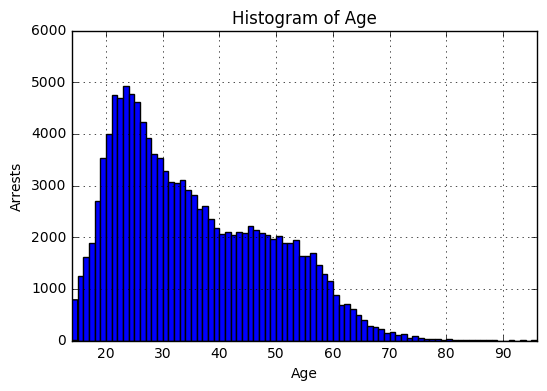

In [15]:
plt.hist(Arrest['AGE'], bins = 82)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Arrests')
plt.axis([14,96,0,6000])
plt.grid(True)
plt.show()

We can then take a look at the average crime age of each area, we see that Area 1 have the highest age among all areas.

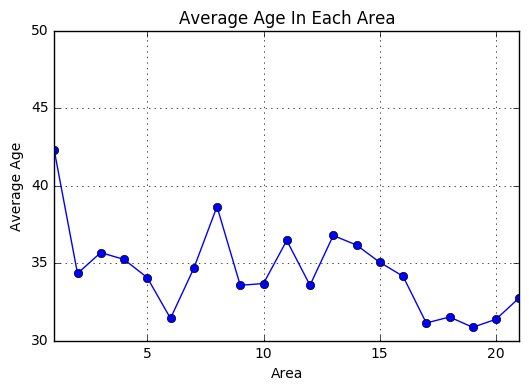

In [16]:
AvgAge_21 = []
AvgAge_21.append(0)
for i in range(1,22):
    a = Arrest[Arrest['AREA'] == i]
    avg = a['AGE'].mean()
    AvgAge_21.append(avg)
    
plt.title('Average Age In Each Area')
plt.plot(np.asarray(AvgAge_21), '-o')
plt.xlabel('Area')
plt.ylabel('Average Age')
plt.axis([1,21,30,50])
plt.grid(True)
plt.show()

## Five Categories of Crimes
The criminal systems in most states divide their crimes into several categories, usually depending on how serious the crimes are. This categorization allows the court to determine how to treat each particular case. In this dataset, there are 5 main categories that a crime can be placed in and the categoization of each arrest is shown in the 'ARST_TYP_CD' column. 

The 5 categories are defeind as the following:

| Letter        | Category      | 
| ------------- |:-------------:|
| D             | Detention     |
| F             | Felony        | 
| I             | Illegal       |
| M             | Misdemeanor   |
| O             | Other         |

The bar chart below provides an overview on the counts of each type of crime. Most of the crimes are either felony or misdemeanor, which are considered to be much more serious. Detention essentially means non-criminal detentions and that is why the number of counts is barely visible on the graph.

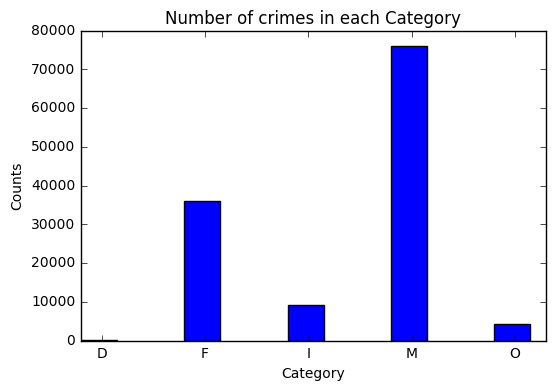

In [17]:
a = np.unique(Arrest['ARST_TYP_CD'], return_counts = True)
N = 5
index = np.arange(N)
plt.bar(index, a[1], 0.35)
plt.title('Number of crimes in each Category')
plt.xlabel('Category')
plt.ylabel('Counts')
plt.xticks(index + 0.2, a[0])
plt.show()

## Types of Crime
Each crime is assigned a charge code(CHRG_GRP_CD) ranging from 1 to 27 with a category and descrption. This part of analysis will not include entries that do not have a charge code, and the calculation below shows that about 11.4% of arrests were made without specific charge code.

In [18]:
a = np.unique(Arrest['CHRG_GRP_CD'].isnull(), return_counts = True)
a[1][1] / a[1][0]

0.11399221127147888

There are also a few entires with charge code 29 and no description. In this part of analysis, a new dataframe will be created containing only the data with legit charge code and description.

In [19]:
Arrest_Crimetyp = Arrest[Arrest['CHRG_GRP_CD'].isin(range(1,27))]
Index = range(0, len(Arrest_Crimetyp), 1)
Arrest_Crimetyp.set_index(np.asarray(Index), inplace = True)

In [54]:
import plotly.plotly as py
from plotly.tools import FigureFactory as FF 

data_matrix = [['Country', 'Year', 'Population'],
               ['United States', 2000, 282200000],
               ['Canada', 2000, 27790000],
               ['United States', 2005, 295500000],
               ['Canada', 2005, 32310000],
               ['United States', 2010, 309000000],
               ['Canada', 2010, 34000000]]

table = FF.create_table(data_matrix)
py.iplot(table, filename='simple_table')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ayl019/0 or inside your plot.ly account where it is named 'simple_table'


In [20]:
np.unique(Arrest_Crimetyp['CHRG_GRP_CD'])

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.])

In [21]:
Race = ['C', 'F', 'G', 'I', 'J', 'K', 'P', 'S', 'V', 'X', 'Z']
for i in range(0, len(Arrest)):
    if Arrest['DESCENT_CD'][i] in Race:
        Arrest.iloc[i, Arrest.columns.get_loc('DESCENT_CD')] = "O"

In [22]:
#Arrests by hour
#Arrest.groupby(by = 'TIME')['RPT_ID'].nunique()

In [23]:
a = Arrest.pivot_table(index = "CHRG_GRP_CD", columns = "GRP_DESC", aggfunc=len, values = "RPT_ID" )

In [24]:
#Calcualte average age of each RD
ReptDist = np.unique(Arrest['RD'])
AvgAge = []

for i in range(0, len(ReptDist)):
    RD_age = Arrest[Arrest['RD'] == ReptDist[i]]['AGE']
    a = sum(RD_age) / len(RD_age)
    AvgAge.append(a)

AvgAge = np.asarray(AvgAge)

In [25]:
#Declare columns names for the completed dataframe
Columns_1 = ['Area', 'ReptDist']
Columns_2 = ['AvgAge', 'Arrests', 'CrimeRepts', 'CallForServ', 'Male', 'Female', 'White', 'Black', 'Hispanic', 'Asian',
             'Other_rac', 'Felony', 'Detent', 'Illegal', 'Misdemeanor', 'Other_Arst']
Columns_4 = ['PopulationEstm', 'WhiteEstm', 'BlackEstm', 'HispanicEstm', 'AsianEstm', 'OtherEstm', 'MaleEstm', 'FemaleEstm']

In [26]:
#Calculate arrests in each RD
Arrests = Arrest.groupby(by = ['RD'])['RPT_ID'].nunique()
Arrests = np.asarray(Arrests)

In [27]:
#Declare columns names for the completed dataframe
Columns_1 = ['Area', 'ReptDist']
Columns_2 = ['AvgAge', 'Arrests', 'CrimeRepts', 'CallForServ', 'Male', 'Female', 'White', 'Black', 'Hispanic', 'Asian',
             'Other_rac', 'Felony', 'Detent', 'Illegal', 'Misdemeanor', 'Other_Arst']
Columns_4 = ['PopulationEstm', 'WhiteEstm', 'BlackEstm', 'HispanicEstm', 'AsianEstm', 'OtherEstm', 'MaleEstm', 'FemaleEstm']

In [28]:
#DF for merge
Crime_RD = np.unique(Crime['RD'])
Crime_DF = pd.DataFrame(columns = ['ReptDist', 'Reports'])
Reports = Crime.groupby(by = 'RD')['DR. NO'].nunique()
Crime_DF['ReptDist']= Crime_RD
Crime_DF['Reports'] = np.asarray(Reports)

In [29]:
#DF for merge
Call_UniqRD = np.unique(Call['Rpt_Dist'])
Call_DF = pd.DataFrame(columns = ['ReptDist', 'Calls'])
Calls = Call.groupby(by = 'Rpt_Dist')['Incident_Number'].nunique()
Call_DF['ReptDist'] = Call_UniqRD
Call_DF['Calls'] = np.asarray(Calls)

In [30]:
Male, Female = ([] for i in range(2))

for i in range(0, len(ReptDist)):
    RD = Arrest[Arrest['RD'] == ReptDist[i]]
    M = RD[RD['SEX_CD'] == "M"]
    F = RD[RD['SEX_CD'] == "F"]
    Male.append(len(M))
    Female.append(len(F))

In [31]:
White, Black, Hispanic, Asian, Other_rac = ([] for i in range(5))

for i in range(0, len(ReptDist)):
    RD = Arrest[Arrest['RD'] == ReptDist[i]]
    W = RD[RD['DESCENT_CD'] == "W"]
    B = RD[RD['DESCENT_CD'] == "B"]
    H = RD[RD['DESCENT_CD'] == "H"]
    A = RD[RD['DESCENT_CD'] == "A"]
    O = RD[RD['DESCENT_CD'] == "O"]
    White.append(len(W))
    Black.append(len(B))
    Hispanic.append(len(H))
    Asian.append(len(A))
    Other_rac.append(len(O))


In [32]:
Felony, Detent, Illegal, Misdemeanor, Other_Arst = ([] for i in range(5))

for i in range(0, len(ReptDist)):
    RD = Arrest[Arrest['RD'] == ReptDist[i]]
    F = RD[RD['ARST_TYP_CD'] == "F"]
    D = RD[RD['ARST_TYP_CD'] == "D"]
    I = RD[RD['ARST_TYP_CD'] == "I"]
    M = RD[RD['ARST_TYP_CD'] == "M"]
    OA = RD[RD['ARST_TYP_CD'] == "O"]
    Felony.append(len(F))
    Detent.append(len(D))
    Illegal.append(len(I))
    Misdemeanor.append(len(M))
    Other_Arst.append(len(OA))

In [33]:
#ReptDist column for full dataset
Area = []
for i in range(0, len(ReptDist)):
    a = int(ReptDist[i]/100)
    Area.append(a)

In [34]:
#Dataframe by reporting districts
full = pd.DataFrame(columns = (Columns_1 + Columns_2))
full['Area'] = Area
full['ReptDist'] = ReptDist
full["AvgAge"] = AvgAge
full['Arrests'] = Arrests
full['Male'] = Male
full['Female'] = Female
full['White'] = White
full['Black'] = Black
full['Hispanic'] = Hispanic
full['Asian'] = Asian
full['Other_rac'] = Other_rac
full['Felony'] = Felony
full['Detent'] = Detent
full['Illegal'] = Illegal
full['Misdemeanor'] = Misdemeanor
full['Other_Arst'] = Other_Arst

full = full.merge(Crime_DF, how = 'left', on = 'ReptDist')
full = full.merge(Call_DF, how = 'left', on = 'ReptDist')
full['CrimeRepts'] = full['Reports']
full['CallForServ'] = full['Calls']
del full['Reports']
del full['Calls']
full.head()

,Area,ReptDist,AvgAge,Arrests,CrimeRepts,CallForServ,Male,Female,White,Black,Hispanic,Asian,Other_rac,Felony,Detent,Illegal,Misdemeanor,Other_Arst
0,1,101,34.132530,83,167.0,700.0,63,20,14,21,43,0,5,20,0,1,58,4
1,1,105,37.157895,19,61.0,193.0,17,2,2,5,12,0,0,5,0,0,11,3
2,1,109,34.857143,7,6.0,10.0,6,1,1,2,3,0,1,0,0,0,7,0
3,1,111,38.574468,517,639.0,2988.0,378,139,132,83,248,4,50,80,0,4,423,10
4,1,112,36.444444,45,56.0,219.0,32,13,7,5,29,0,4,11,0,0,33,1


In [35]:
#Data of 21 Areas
Demographic = data['LAPD_Demographic']
Male_ratio = 1889064/3792621
Female_ratio = 1 - Male_ratio
Columns_3 = ['PopulationEstm', 'WhiteEstm', 'BlackEstm', 'HispanicEstm', 'AsianEstm', 'OtherEstm', 'MaleEstm', 'FemaleEstm']
full_Area = pd.DataFrame(columns = (Columns_1 + Columns_2 + Columns_3))
Area_21 = list(range(1,22))
full_Area['Area'] = Area_21
a = b = d = []

for i in range(1, 22):
    a = full[full['Area'] == i]
    d = Demographic[Demographic['Area'] == i]
    full_Area.iloc[(i-1), full_Area.columns.get_loc('ReptDist')] = len(a)
    for f in Columns_2:
        if f == "AvgAge":
            b = a[f].mean()
            full_Area.iloc[(i-1), full_Area.columns.get_loc(f)] = b
        else:
            b = a[f].sum(skipna = True)
            full_Area.iloc[(i-1), full_Area.columns.get_loc(f)] = b
    for g in Columns_3:
        if (g != "MaleEstm") & (g != "FemaleEstm"):
            b = d[g].mean()
            full_Area.iloc[(i-1), full_Area.columns.get_loc(g)] = b
            
full_Area['MaleEstm'] = (full_Area['PopulationEstm'] * Male_ratio).apply(np.round)
full_Area['FemaleEstm'] = full_Area['PopulationEstm'] - full_Area['MaleEstm']
full_Area.head()

,Area,ReptDist,AvgAge,Arrests,CrimeRepts,CallForServ,Male,Female,White,Black,...,Misdemeanor,Other_Arst,PopulationEstm,WhiteEstm,BlackEstm,HispanicEstm,AsianEstm,OtherEstm,MaleEstm,FemaleEstm
0,1,53,39.1457,13582,10750,44204,10665,2917,1840,7177,...,9502,860,230192,34326,46778,76851,64545,7692,114656.0,115536
1,2,59,32.6116,6341,9731,44597,5372,969,613,976,...,3021,113,197991,17808,6673,138211,31237,4062,98617.0,99374
2,3,59,35.309,6730,14733,57750,5178,1552,278,4271,...,4182,198,184562,10827,77983,81958,8895,4899,91928.0,92634
3,4,64,34.2311,4027,8564,38869,3412,615,203,174,...,1665,178,190777,7125,2282,161687,17943,1740,95024.0,95753
4,5,51,34.1509,4286,9816,42901,3305,981,842,615,...,2578,162,187545,50520,12873,106042,12632,5478,93414.0,94131


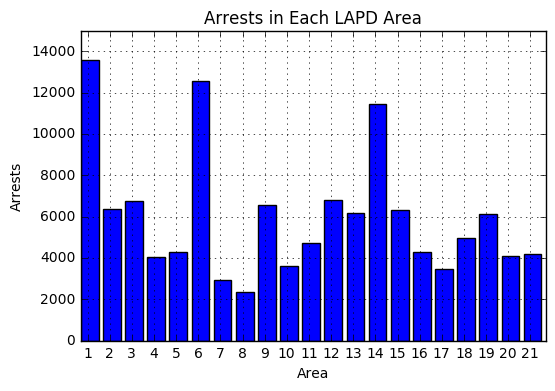

In [36]:
xaxis = 21
bar_width = 0.3
index = np.arange(xaxis)
plt.bar(index, full_Area['Arrests'])
plt.title('Arrests in Each LAPD Area')
plt.xlabel('Area')
plt.ylabel('Arrests')
plt.axis([0,21,0,15000])
plt.grid(True)
plt.xticks(index + bar_width, range(1,22))
plt.show()

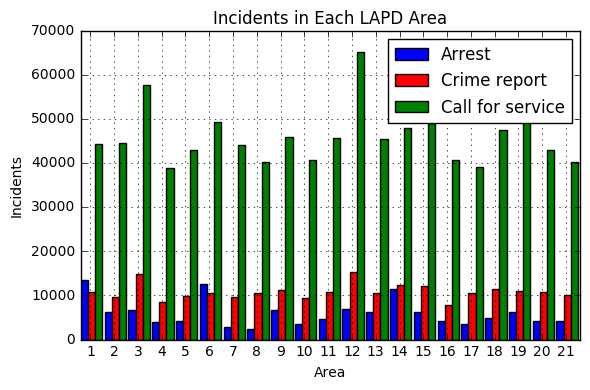

In [37]:
plt.bar(index, full_Area['Arrests'], bar_width, label = "Arrest")
plt.bar(index+bar_width, full_Area['CrimeRepts'], bar_width, color = 'r', label = "Crime report")
plt.bar(index+bar_width*2, full_Area['CallForServ'], bar_width, color = 'g', label = "Call for service")
plt.title('Incidents in Each LAPD Area')
plt.xlabel('Area')
plt.ylabel('Incidents')
plt.axis([0,21,0,70000])
plt.grid(True)
plt.xticks(index + bar_width+0.1, range(1,22))
plt.legend()
plt.tight_layout()
plt.show()

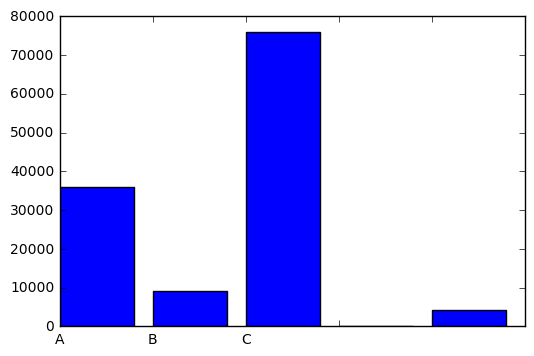

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(np.arange(5), [sum(Felony),sum(Illegal), sum(Misdemeanor), sum(Detent), sum(Other_Arst)])

ax.set_xticklabels( ('A','B','C') )
plt.show()

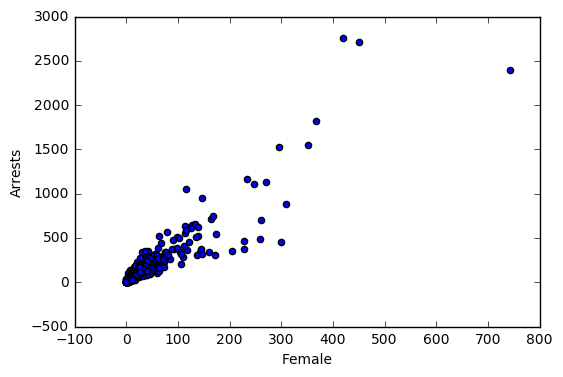

In [39]:
full.plot.scatter(x='Female', y='Arrests')